<a href="https://colab.research.google.com/github/RounakNeogy/RegionalCharacterdetection/blob/main/cmaterDB_All_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/MyDrive/cmaterDB.zip> /dev/null

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow-addons --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os
import cv2
from PIL import ImageFile,Image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Reshape, LSTM
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import regularizers

In [ ]:
train_folder = "Dataset/Train" 
test_folder = "Dataset/Test"
dimensions = (64, 64)

In [ ]:
train_folder = "Dataset/main/train" 
test_folder = "Dataset/main/val"
dimensions = (28, 28)

In [ ]:
def process_images(folder):
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i = 0

    for class_x in classes:
        i += 1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store' and i != 'Thumbs.db']
            print(len(images))
            for image in images:
                if os.path.isdir(image):
                    subfolder_images = [os.path.join(image, sub_image) for sub_image in sorted(os.listdir(image)) if sub_image != '.DS_Store' and sub_image != 'Thumbs.db']
                    for sub_image in subfolder_images:
                        img_cnt += 1
                        process_image(sub_image, img_cnt)
                else:
                    if(image != "Dataset/Test/172/bcc000060.db"):
                      img_cnt += 1
                      process_image(image, img_cnt)

    print("Finished processing images, images found = ")
    print(img_cnt)


def process_image(image_path, img_cnt):
    if img_cnt % 1000 == 0:  # show progress
        print("Processed %s images" % str(img_cnt))

    im = Image.open(image_path)
    print(image_path)
    im = im.resize(dimensions)  # resize image according to dimensions set

    im = im.convert('L')

    image_array = np.array(im)
    otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    im = Image.fromarray(image_result)

    im.save(image_path)

process_images(train_folder)
process_images(test_folder)


In [ ]:
#For printing images
def process_images(folder):
    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i = 0

    for class_x in classes:
        i += 1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store' and i != 'Thumbs.db']
            print(len(images))
            for image in images:
                if os.path.isdir(image):
                    subfolder_images = [os.path.join(image, sub_image) for sub_image in sorted(os.listdir(image)) if sub_image != '.DS_Store' and sub_image != 'Thumbs.db']
                    for sub_image in subfolder_images:
                        img_cnt += 1
                        process_image(sub_image, img_cnt)
                else:
                    if(image != "Dataset/Test/172/bcc000060.db"):
                      img_cnt += 1
                      process_image(image, img_cnt)

    print("Finished processing images, images found = ")
    print(img_cnt)


def process_image(image_path, img_cnt):
    im = Image.open(image_path)
    print(image_path)
    im.show()

process_images(test_folder)

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = "same", input_shape = (28, 28, 1)))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Reshape((3,3*128),input_shape=(3,3,128)))
classifier.add(LSTM(128, return_sequences=True))

classifier.add(Flatten())

classifier.add(Dense(units = 128))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 64))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 221, activation = 'softmax'))

opt=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95)            
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        1

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [ ]:
splitfolders.ratio("Dataset/Train", output="Dataset/Main",
    seed=1337, ratio=(.9,.1), group_prefix=None, move=False)

Copying files: 39346 files [00:07, 5260.95 files/s]


In [ ]:
train_folder = "/content/Dataset/Main/train"
val_folder = "/content/Dataset/Main/val"
test_folder = "/content/Dataset/Test"

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set = test_datagen.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 35210 images belonging to 221 classes.
Found 4013 images belonging to 221 classes.
Found 11254 images belonging to 221 classes.


In [ ]:
history1=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights1.h5')

Epoch 1/50
1101/1101 [==============================] - 40s 32ms/step - loss: 5.3260 - accuracy: 0.0074 - val_loss: 5.1808 - val_accuracy: 0.0177
Epoch 2/50
1101/1101 [==============================] - 32s 29ms/step - loss: 5.0641 - accuracy: 0.0255 - val_loss: 4.7403 - val_accuracy: 0.0668
Epoch 3/50
1101/1101 [==============================] - 31s 28ms/step - loss: 4.6364 - accuracy: 0.0618 - val_loss: 4.1607 - val_accuracy: 0.1368
Epoch 4/50
1101/1101 [==============================] - 31s 28ms/step - loss: 4.1644 - accuracy: 0.1011 - val_loss: 3.5233 - val_accuracy: 0.2153
Epoch 5/50
1101/1101 [==============================] - 33s 30ms/step - loss: 3.7333 - accuracy: 0.1481 - val_loss: 2.9786 - val_accuracy: 0.3132
Epoch 6/50
1101/1101 [==============================] - 35s 32ms/step - loss: 3.3645 - accuracy: 0.1966 - val_loss: 2.5454 - val_accuracy: 0.4039
Epoch 7/50
1101/1101 [==============================] - 31s 28ms/step - loss: 3.0537 - accuracy: 0.2448 - val_loss: 2.1752 -

In [ ]:
classifier.evaluate(test_set)

352/352 [==============================] - 5s 15ms/step - loss: 2.3886 - accuracy: 0.7789


[2.3886168003082275, 0.7789230346679688]

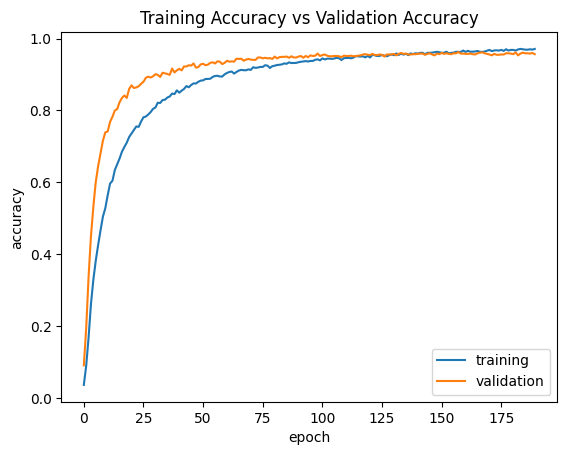

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

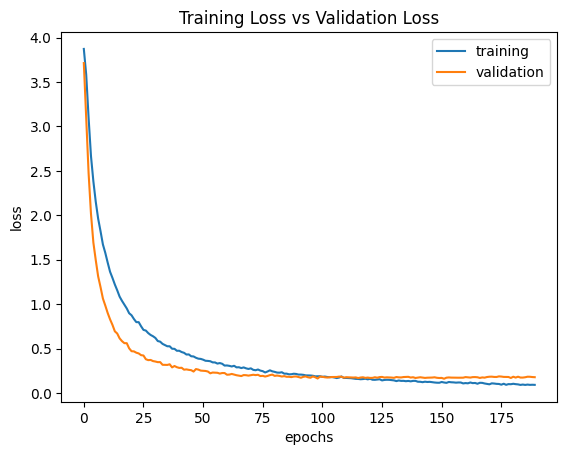

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
classifier.load_weights('train_weights1.h5')
history2=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights2.h5')

Epoch 1/50
1101/1101 [==============================] - 33s 30ms/step - loss: 0.6697 - accuracy: 0.7954 - val_loss: 0.3220 - val_accuracy: 0.9016
Epoch 2/50
1101/1101 [==============================] - 32s 29ms/step - loss: 0.6567 - accuracy: 0.7976 - val_loss: 0.3252 - val_accuracy: 0.9018
Epoch 3/50
1101/1101 [==============================] - 31s 28ms/step - loss: 0.6420 - accuracy: 0.8035 - val_loss: 0.3215 - val_accuracy: 0.8996
Epoch 4/50
1101/1101 [==============================] - 30s 28ms/step - loss: 0.6341 - accuracy: 0.8043 - val_loss: 0.3240 - val_accuracy: 0.8996
Epoch 5/50
1101/1101 [==============================] - 31s 28ms/step - loss: 0.6266 - accuracy: 0.8091 - val_loss: 0.3209 - val_accuracy: 0.9018
Epoch 6/50
1101/1101 [==============================] - 32s 29ms/step - loss: 0.6267 - accuracy: 0.8062 - val_loss: 0.3117 - val_accuracy: 0.9056
Epoch 7/50
 483/1101 [============>.................] - ETA: 16s - loss: 0.6187 - accuracy: 0.8086

In [ ]:
classifier.evaluate(test_set)

NameError: ignored

In [ ]:
classifier.load_weights('train_weights2.h5')
history3=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights3.h5')

Epoch 1/50
1101/1101 [==============================] - 30s 27ms/step - loss: 0.3159 - accuracy: 0.8976 - val_loss: 0.1913 - val_accuracy: 0.9417
Epoch 2/50
1101/1101 [==============================] - 30s 27ms/step - loss: 0.3145 - accuracy: 0.8977 - val_loss: 0.1973 - val_accuracy: 0.9404
Epoch 3/50
1101/1101 [==============================] - 30s 28ms/step - loss: 0.3055 - accuracy: 0.9017 - val_loss: 0.1928 - val_accuracy: 0.9385
Epoch 4/50
1101/1101 [==============================] - 30s 28ms/step - loss: 0.3127 - accuracy: 0.8994 - val_loss: 0.1951 - val_accuracy: 0.9389
Epoch 5/50
1101/1101 [==============================] - 30s 27ms/step - loss: 0.3042 - accuracy: 0.9018 - val_loss: 0.1897 - val_accuracy: 0.9407
Epoch 6/50
1101/1101 [==============================] - 30s 27ms/step - loss: 0.3085 - accuracy: 0.9000 - val_loss: 0.1893 - val_accuracy: 0.9387
Epoch 7/50
1101/1101 [==============================] - 31s 28ms/step - loss: 0.3138 - accuracy: 0.8965 - val_loss: 0.1859 -

In [ ]:
classifier.evaluate(test_set)

352/352 [==============================] - 6s 16ms/step - loss: 2.3711 - accuracy: 0.8196


[2.371077537536621, 0.8196197152137756]

In [ ]:
classifier.load_weights('train_weights3.h5')
history1=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 100,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights4.h5')

Epoch 1/100
338/338 [==============================] - 11s 31ms/step - loss: 0.8114 - accuracy: 0.7566 - val_loss: 0.3173 - val_accuracy: 0.9058
Epoch 2/100
338/338 [==============================] - 10s 31ms/step - loss: 0.8112 - accuracy: 0.7573 - val_loss: 0.3126 - val_accuracy: 0.9033
Epoch 3/100
338/338 [==============================] - 9s 27ms/step - loss: 0.8072 - accuracy: 0.7597 - val_loss: 0.2985 - val_accuracy: 0.9133
Epoch 4/100
338/338 [==============================] - 10s 31ms/step - loss: 0.8026 - accuracy: 0.7631 - val_loss: 0.3003 - val_accuracy: 0.9100
Epoch 5/100
338/338 [==============================] - 11s 34ms/step - loss: 0.8000 - accuracy: 0.7583 - val_loss: 0.2970 - val_accuracy: 0.9125
Epoch 6/100
338/338 [==============================] - 10s 30ms/step - loss: 0.7912 - accuracy: 0.7612 - val_loss: 0.2981 - val_accuracy: 0.9125
Epoch 7/100
338/338 [==============================] - 11s 31ms/step - loss: 0.7968 - accuracy: 0.7605 - val_loss: 0.2838 - val_acc

In [ ]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 14ms/step - loss: 0.2473 - accuracy: 0.9230


[0.24728159606456757, 0.9229999780654907]

In [ ]:
classifier.load_weights('train_weights4.h5')
history2=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 100,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights5.h5')

Epoch 1/100
338/338 [==============================] - 11s 32ms/step - loss: 0.6710 - accuracy: 0.8010 - val_loss: 0.2198 - val_accuracy: 0.9283
Epoch 2/100
338/338 [==============================] - 11s 32ms/step - loss: 0.6786 - accuracy: 0.7955 - val_loss: 0.2222 - val_accuracy: 0.9267
Epoch 3/100
338/338 [==============================] - 11s 31ms/step - loss: 0.6410 - accuracy: 0.8129 - val_loss: 0.2262 - val_accuracy: 0.9300
Epoch 4/100
338/338 [==============================] - 11s 31ms/step - loss: 0.6614 - accuracy: 0.7997 - val_loss: 0.2291 - val_accuracy: 0.9275
Epoch 5/100
338/338 [==============================] - 11s 31ms/step - loss: 0.6504 - accuracy: 0.8044 - val_loss: 0.2236 - val_accuracy: 0.9283
Epoch 6/100
338/338 [==============================] - 11s 31ms/step - loss: 0.6607 - accuracy: 0.8003 - val_loss: 0.2338 - val_accuracy: 0.9258
Epoch 7/100
338/338 [==============================] - 10s 30ms/step - loss: 0.6508 - accuracy: 0.8048 - val_loss: 0.2246 - val_ac

In [ ]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 14ms/step - loss: 0.2157 - accuracy: 0.9323


[0.21566443145275116, 0.9323333501815796]

In [ ]:
classifier.load_weights('train_weights5.h5')
history3=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 100,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights6.h5')

Epoch 1/100
338/338 [==============================] - 10s 29ms/step - loss: 0.5611 - accuracy: 0.8320 - val_loss: 0.1897 - val_accuracy: 0.9383
Epoch 2/100
338/338 [==============================] - 11s 33ms/step - loss: 0.5863 - accuracy: 0.8200 - val_loss: 0.1963 - val_accuracy: 0.9383
Epoch 3/100
338/338 [==============================] - 11s 33ms/step - loss: 0.5781 - accuracy: 0.8295 - val_loss: 0.1981 - val_accuracy: 0.9325
Epoch 4/100
338/338 [==============================] - 9s 27ms/step - loss: 0.5683 - accuracy: 0.8326 - val_loss: 0.1942 - val_accuracy: 0.9325
Epoch 5/100
338/338 [==============================] - 11s 31ms/step - loss: 0.5801 - accuracy: 0.8230 - val_loss: 0.1904 - val_accuracy: 0.9383
Epoch 6/100
338/338 [==============================] - 11s 33ms/step - loss: 0.5768 - accuracy: 0.8240 - val_loss: 0.1921 - val_accuracy: 0.9342
Epoch 7/100
338/338 [==============================] - 9s 27ms/step - loss: 0.5736 - accuracy: 0.8268 - val_loss: 0.1941 - val_accu

In [ ]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 15ms/step - loss: 0.1797 - accuracy: 0.9413


[0.17972849309444427, 0.9413333535194397]

In [ ]:
classifier.load_weights('train_weights6.h5')
history4=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 100,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights5.h5')

Epoch 1/100
338/338 [==============================] - 10s 31ms/step - loss: 0.5280 - accuracy: 0.8413 - val_loss: 0.1870 - val_accuracy: 0.9417
Epoch 2/100
338/338 [==============================] - 9s 27ms/step - loss: 0.5121 - accuracy: 0.8464 - val_loss: 0.1844 - val_accuracy: 0.9383
Epoch 3/100
338/338 [==============================] - 10s 30ms/step - loss: 0.5018 - accuracy: 0.8515 - val_loss: 0.1889 - val_accuracy: 0.9375
Epoch 4/100
338/338 [==============================] - 11s 31ms/step - loss: 0.5142 - accuracy: 0.8441 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 5/100
338/338 [==============================] - 10s 31ms/step - loss: 0.5333 - accuracy: 0.8403 - val_loss: 0.1837 - val_accuracy: 0.9400
Epoch 6/100
338/338 [==============================] - 9s 27ms/step - loss: 0.5058 - accuracy: 0.8457 - val_loss: 0.1799 - val_accuracy: 0.9417
Epoch 7/100
338/338 [==============================] - 11s 32ms/step - loss: 0.5133 - accuracy: 0.8438 - val_loss: 0.1761 - val_accu